In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
# Loading the dataset

df = pd.read_csv(r"C:\Users\itsme\OneDrive\Desktop\CDAC_Project\churn_prediction.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
# Number of rows and columns

df.shape

(28382, 21)

In [4]:
# To display all the columns

pd.set_option("display.max_columns",None)

In [5]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [6]:
# Checking for duplicate data

df.duplicated().sum()

0

In [7]:
#Checking for null values

df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

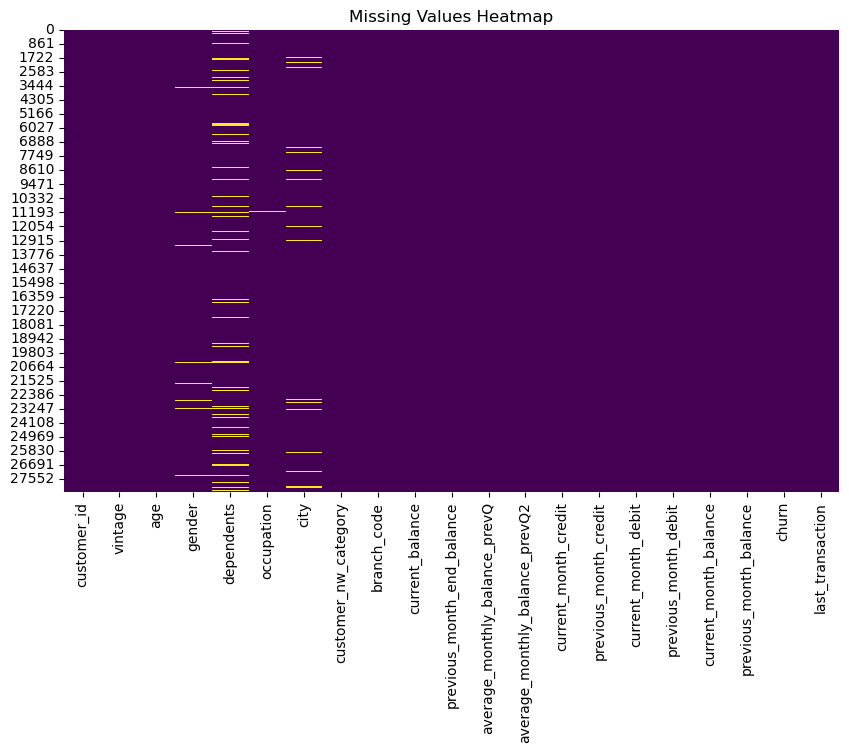

In [8]:
# Heatmap to diplay the distribution of null values in the dataset

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
# Filling the null values

# Used mode to fill Categorical Data
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)

# Used median to fill Numerical Data
df['dependents'].fillna(df['dependents'].median(), inplace=True)

C:\Users\itsme\AppData\Local\Temp\ipykernel_82660\1637380114.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)
C:\Users\itsme\AppData\Local\Temp\ipykernel_82660\1637380114.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [10]:
# Check if all missing values resolved

df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [11]:
# Checking the datatypes of all the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  object 
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  object 
 6   city                            28382 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [12]:
# Converting data types

## Converting the last_transaction (object) feature into datetime format
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

## Converting gender & occupation (object) into categorical format
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')

## Convertng city, branch_code & customer_nw_category (numeric) into categorical format 
df['city'] = df['city'].astype('category')
df['branch_code'] = df['branch_code'].astype('category')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')

In [13]:
# Datetime format is not very suitable when creating models.
# Creating a new column 'days_since_last_transaction' i.e., difference in days from the most recent value in the data
df['days_since_last_transaction'] = (df['last_transaction'].max() - df['last_transaction']).dt.days

# Dropping the last_transaction column
df.drop(columns=['last_transaction'], inplace=True)

# Filling the missing values in ,days_since_last_transaction' with its the median values
df['days_since_last_transaction'].fillna(df['days_since_last_transaction'].median(), inplace = True)

C:\Users\itsme\AppData\Local\Temp\ipykernel_82660\2759680837.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_last_transaction'].fillna(df['days_since_last_transaction'].median(), inplace = True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customer_id                     28382 non-null  int64   
 1   vintage                         28382 non-null  int64   
 2   age                             28382 non-null  int64   
 3   gender                          28382 non-null  category
 4   dependents                      28382 non-null  float64 
 5   occupation                      28382 non-null  category
 6   city                            28382 non-null  category
 7   customer_nw_category            28382 non-null  category
 8   branch_code                     28382 non-null  category
 9   current_balance                 28382 non-null  float64 
 10  previous_month_end_balance      28382 non-null  float64 
 11  average_monthly_balance_prevQ   28382 non-null  float64 
 12  average_monthly_ba

In [15]:
df = df.drop(['customer_id','branch_code'], axis=1)

In [16]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction
0,2101,66,Male,0.0,self_employed,187.0,2,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,224.0
1,2348,35,Male,0.0,self_employed,1020.0,2,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,60.0
2,2194,31,Male,0.0,salaried,146.0,2,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,30.0
3,2329,90,Male,0.0,self_employed,1020.0,2,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,147.0
4,1579,42,Male,2.0,self_employed,1494.0,3,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,58.0


In [17]:
df.describe()

,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction
count,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000,28382.000000
mean,2091.144105,48.208336,0.317102,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329,65.455747
std,272.676775,17.807163,0.958386,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571,82.275475
min,73.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,0.000000
25%,1958.000000,36.000000,0.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000,13.000000
50%,2154.000000,46.000000,0.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000,30.000000
75%,2292.000000,60.000000,0.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000,83.000000
max,2476.000000,90.000000,52.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000,365.000000


In [18]:
balance_columns = [
    'current_balance', 'previous_month_end_balance', 
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 
    'current_month_balance', 'previous_month_balance']
negative = df[df[balance_columns].lt(0).any(axis=1)]

<Axes: xlabel='churn', ylabel='count'>

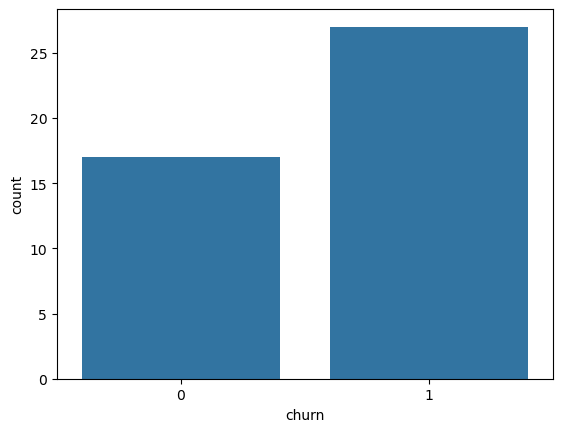

In [19]:
sns.countplot(x='churn', data = negative)

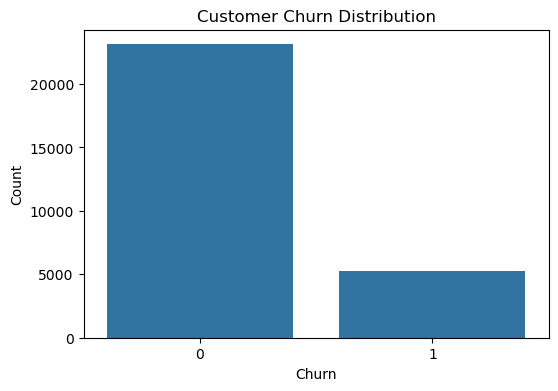

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

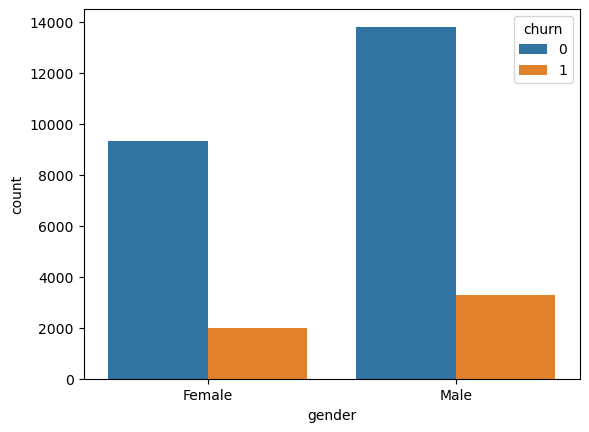

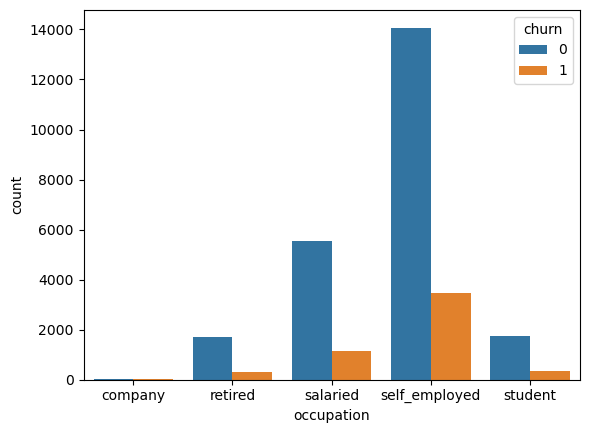

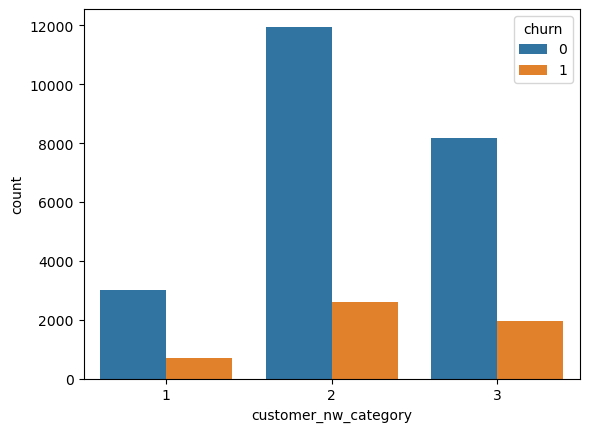

In [21]:
for f in ['gender','occupation','customer_nw_category']:
    plt.figure()
    ax = sns.countplot(x=f, data = df, hue = 'churn')

The median is:  2154.0


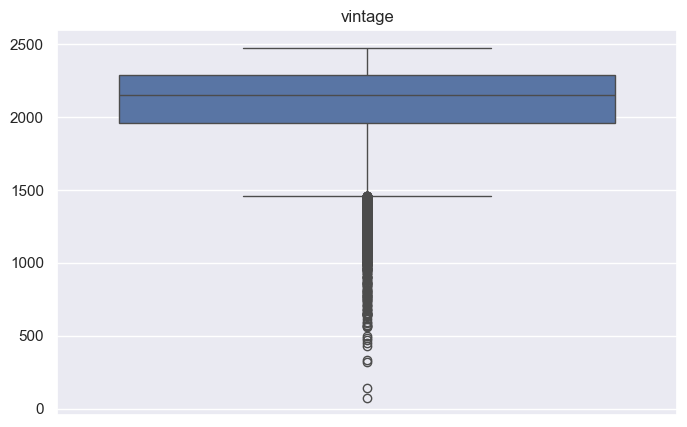

The median is:  46.0


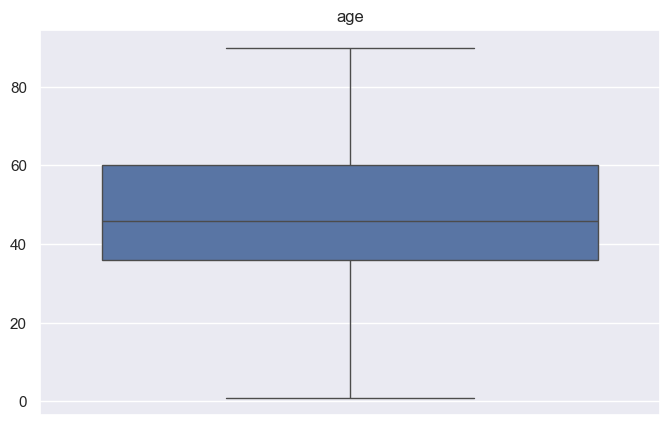

The median is:  0.0


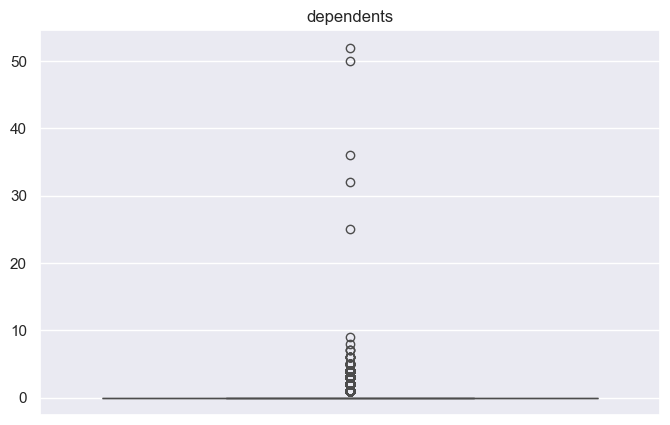

The median is:  3281.255


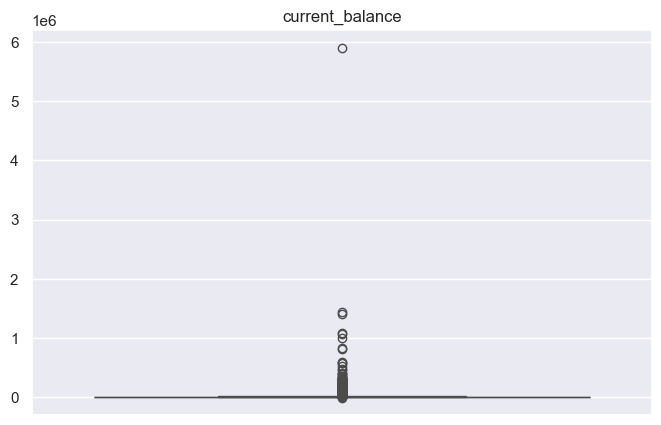

The median is:  3379.915


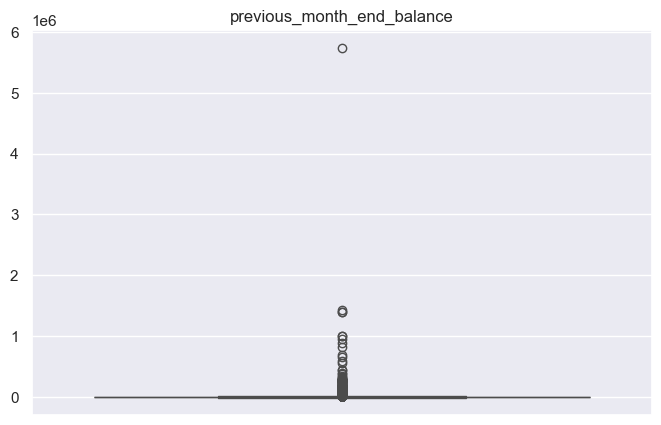

The median is:  3542.865


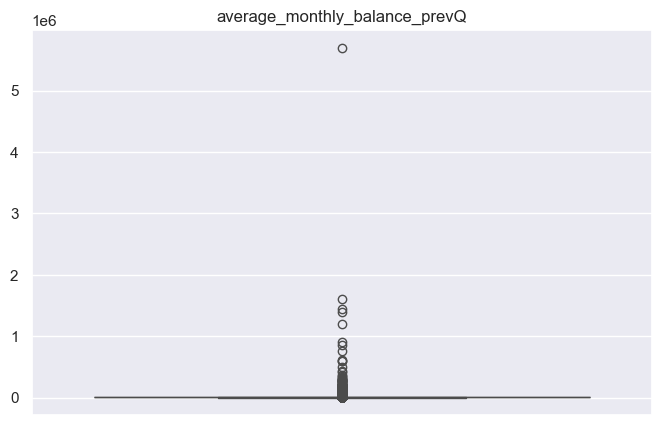

The median is:  3359.6000000000004


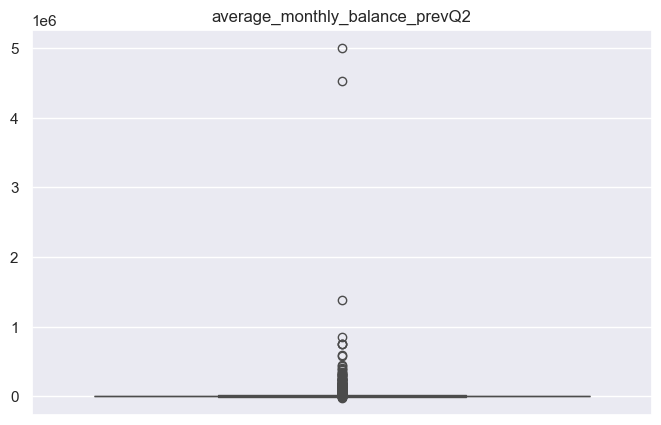

The median is:  0.61


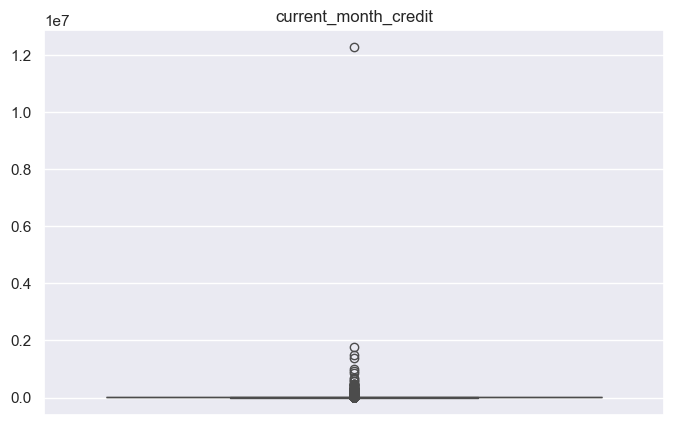

The median is:  0.63


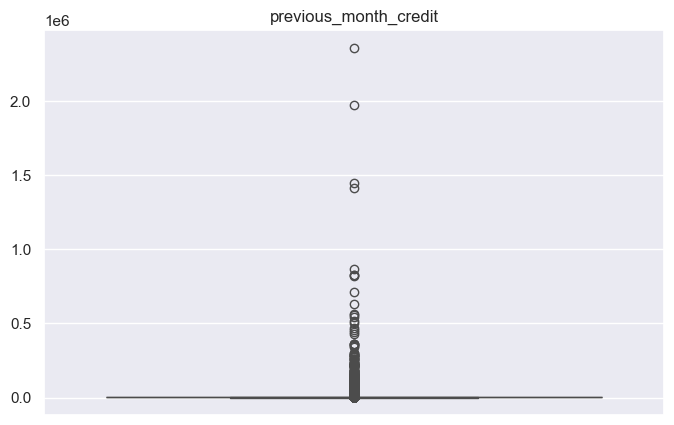

The median is:  91.93


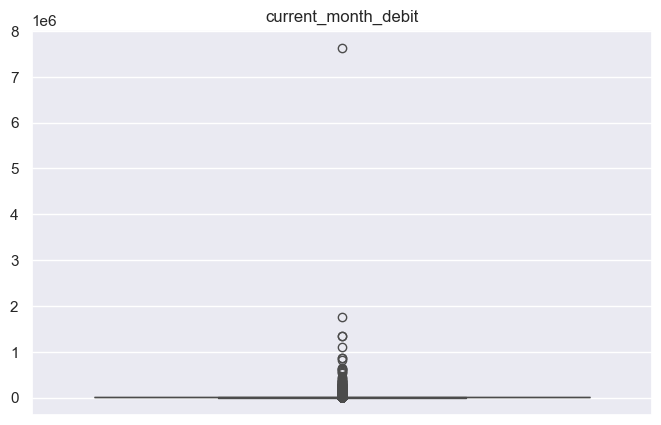

The median is:  109.96000000000001


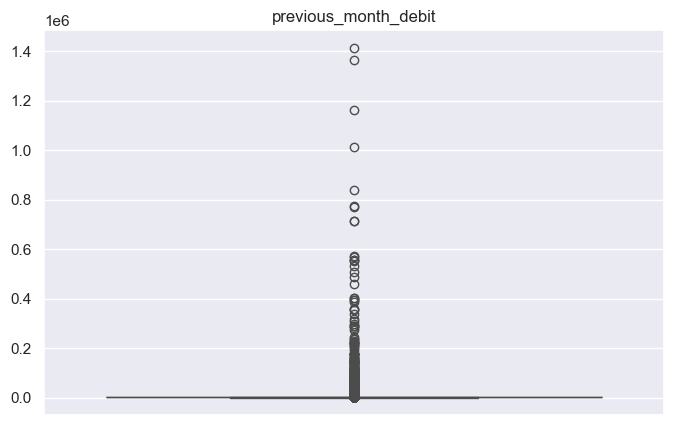

The median is:  3447.995


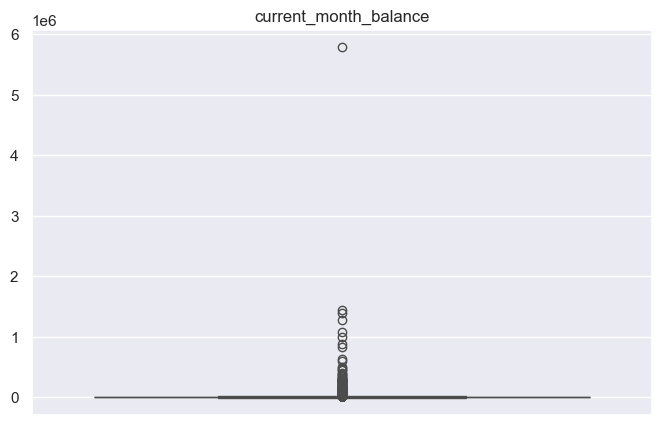

The median is:  3465.2349999999997


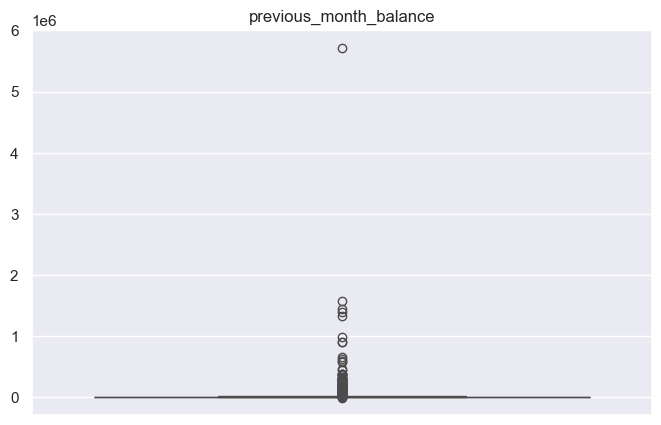

The median is:  0.0


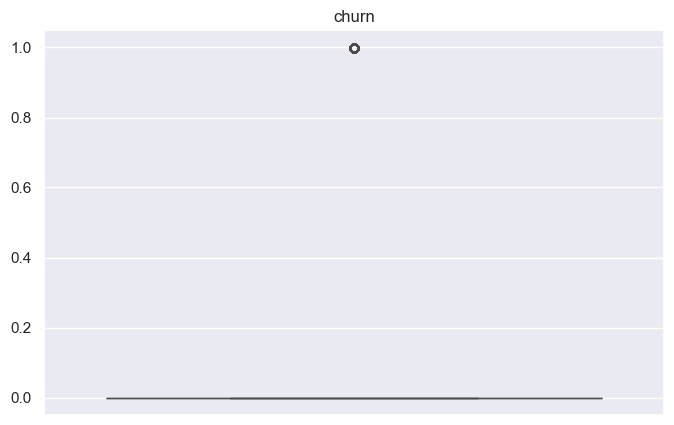

The median is:  30.0


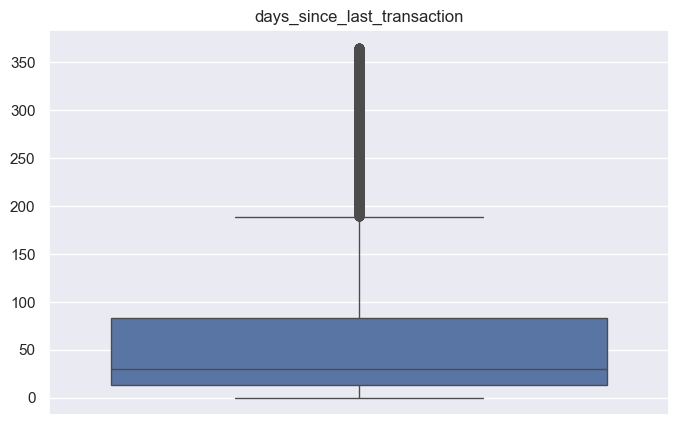

In [22]:
numcols = df.select_dtypes(include=['int64','float64'])
sns.set(rc = {'figure.figsize':(8,5)})
for c in numcols:
    x = df[c].values
    ax = sns.boxplot(x)
    print('The median is: ', df[c].median())
    plt.title(c)
    plt.show()

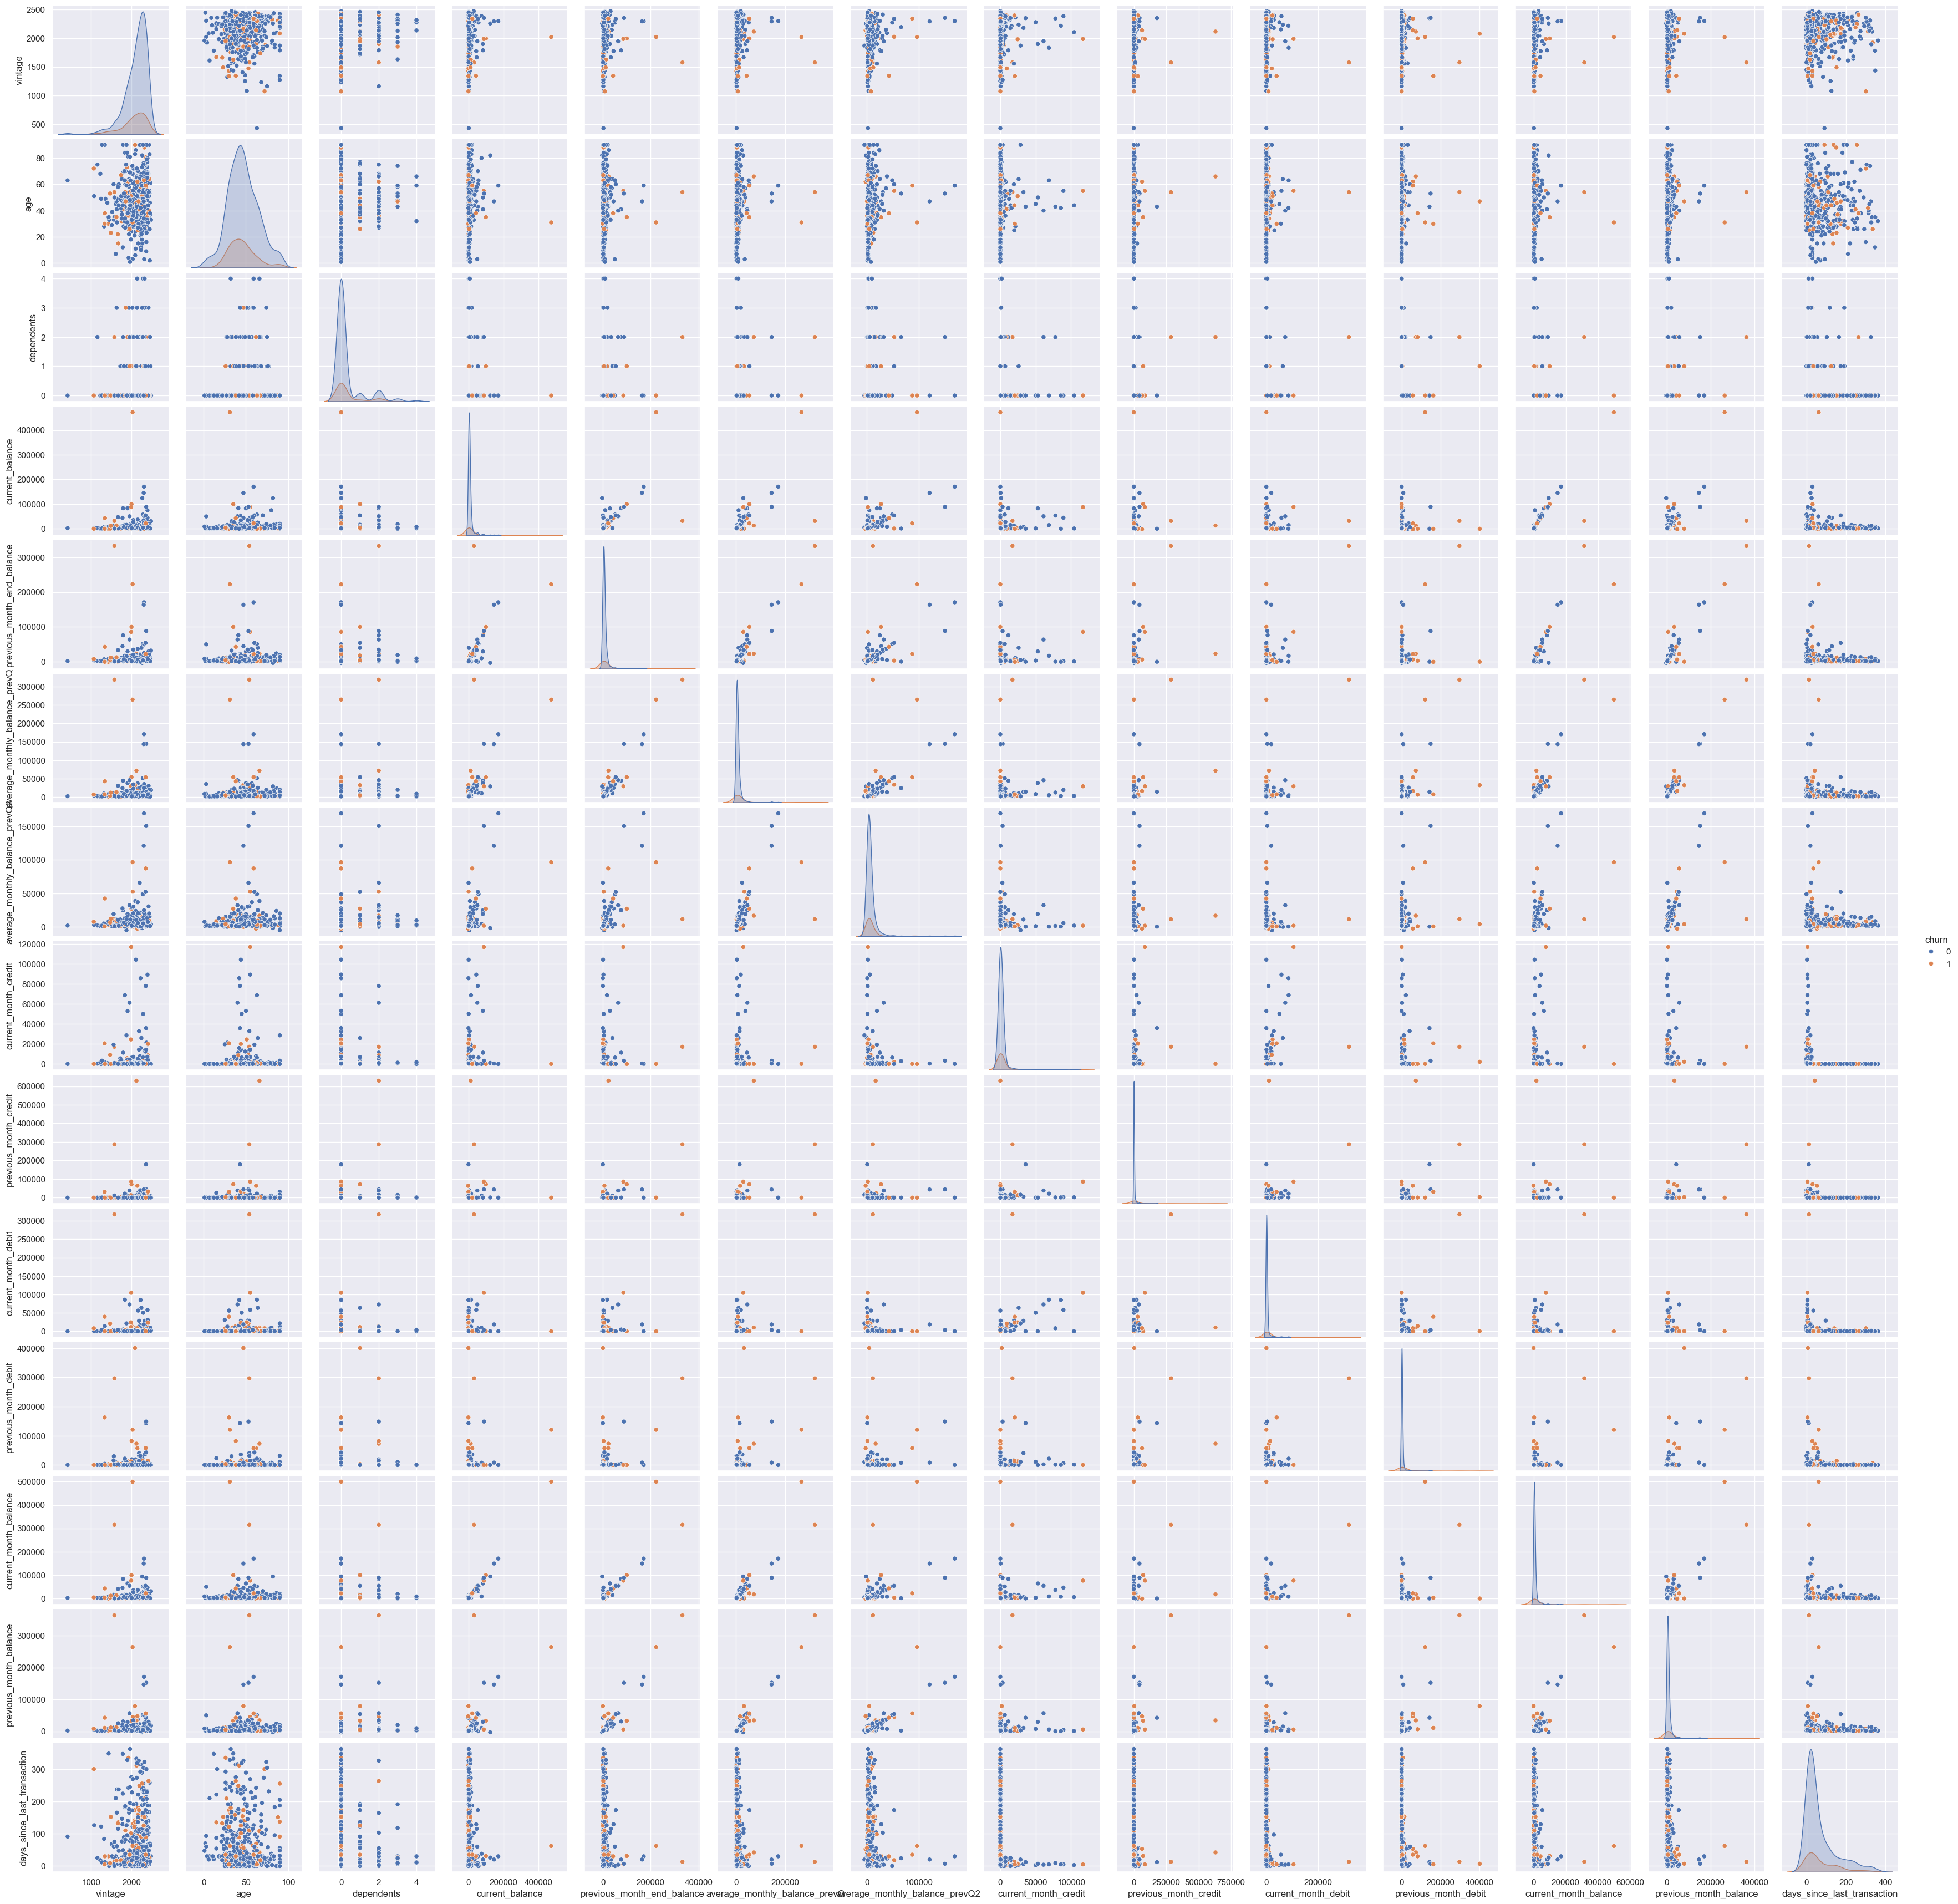

In [23]:
sample_df = df.sample(500, random_state=42)
sns.pairplot(sample_df, hue='churn', diag_kind='kde')
plt.show()

In [24]:
le = LabelEncoder()

In [25]:
df['gender'] = le.fit_transform(df['gender'])
df['occupation'] = le.fit_transform(df['occupation'])
df['city'] = le.fit_transform(df['city'])
df['customer_nw_category'] = le.fit_transform(df['customer_nw_category'])

In [26]:
# Scaling our columns
scale_vars = ['vintage', 'age', 'dependents', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'days_since_last_transaction']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction
0,0.843945,0.730337,1,0.000000,3,182,1,0.001178,0.000802,0.000005,0.003572,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000836,0.001158,0,0.613699
1,0.946733,0.382022,1,0.000000,3,992,1,0.001843,0.002064,0.001118,0.005754,4.482534e-08,2.328724e-07,7.182983e-04,7.110188e-05,0.001707,0.002438,0,0.164384
2,0.882647,0.337079,1,0.000000,2,142,1,0.001593,0.001561,0.000611,0.003844,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.001450,0.001789,0,0.082192
3,0.938826,1.000000,1,0.000000,3,992,1,0.001319,0.000947,0.000115,0.003484,3.749028e-08,1.947660e-07,6.022631e-08,1.515605e-03,0.000980,0.001195,1,0.402740
4,0.626717,0.460674,1,0.038462,3,1452,2,0.001088,0.000792,0.000038,0.003656,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.000784,0.001196,1,0.158904


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         28382 non-null  float64
 1   age                             28382 non-null  float64
 2   gender                          28382 non-null  int32  
 3   dependents                      28382 non-null  float64
 4   occupation                      28382 non-null  int32  
 5   city                            28382 non-null  int64  
 6   customer_nw_category            28382 non-null  int64  
 7   current_balance                 28382 non-null  float64
 8   previous_month_end_balance      28382 non-null  float64
 9   average_monthly_balance_prevQ   28382 non-null  float64
 10  average_monthly_balance_prevQ2  28382 non-null  float64
 11  current_month_credit            28382 non-null  float64
 12  previous_month_credit           

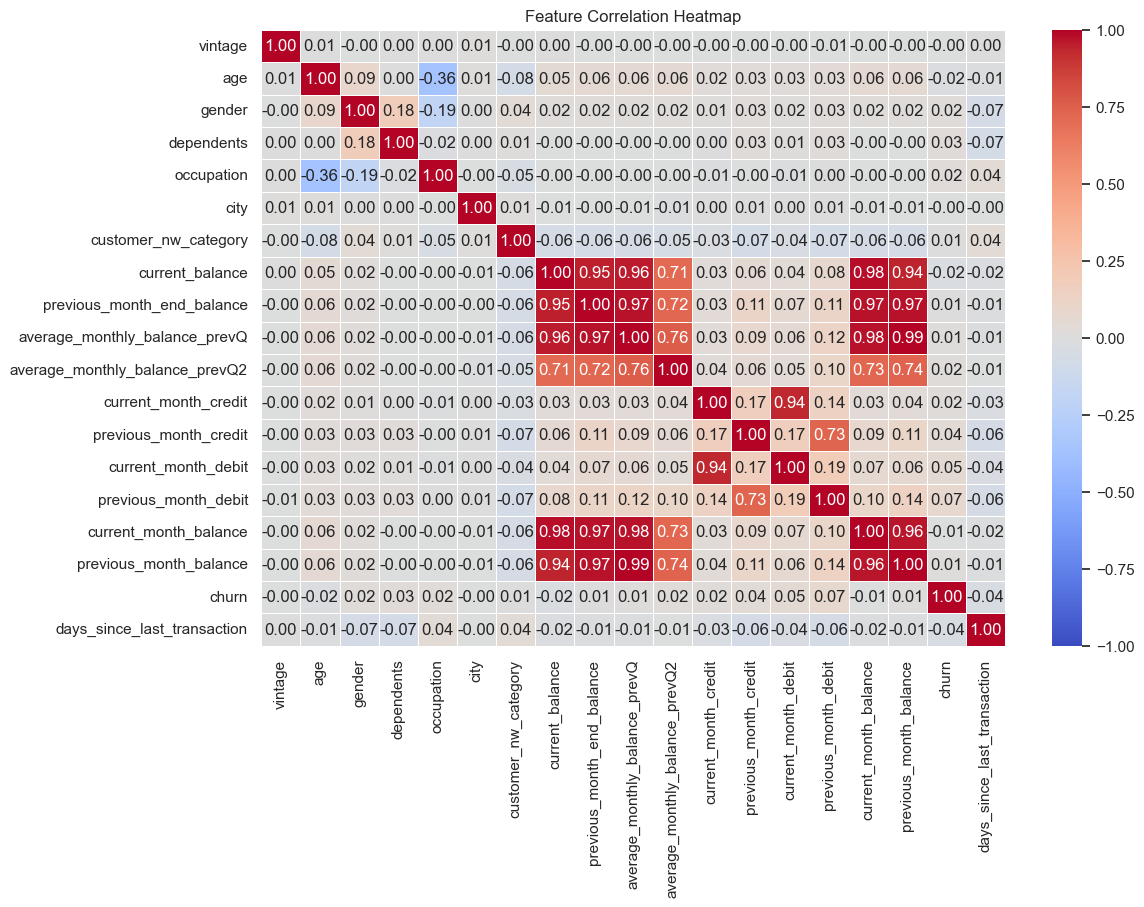

In [28]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax = 1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
x = df.drop('churn', axis = 1)
y =  df['churn']

In [30]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [31]:
x_train.shape

(22705, 18)

**Logistic Regression**

In [32]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)
highly_correlated = [
    'current_balance', 'previous_month_end_balance', 
    'average_monthly_balance_prevQ', 
    'current_month_balance', 'previous_month_balance'
]
pca_balance = PCA(n_components=1)
x_train_scaled['balance_pca'] = pca_balance.fit_transform(x_train_scaled[highly_correlated])
x_test_scaled['balance_pca'] = pca_balance.transform(x_test_scaled[highly_correlated])

In [33]:
# Drop original correlated features
x_train_scaled.drop(columns=highly_correlated, inplace=True)
x_test_scaled.drop(columns=highly_correlated, inplace=True)

In [34]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [35]:
# Predictions
y_pred_log =log_reg.predict(x_test_scaled)
y_pred_log_prob = log_reg.predict_proba(x_test_scaled)[:, 1]

In [36]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Accuracy: 0.8149

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4625
           1       0.51      0.02      0.03      1052

    accuracy                           0.81      5677
   macro avg       0.67      0.51      0.47      5677
weighted avg       0.76      0.81      0.74      5677


Confusion Matrix:
[[4608   17]
 [1034   18]]


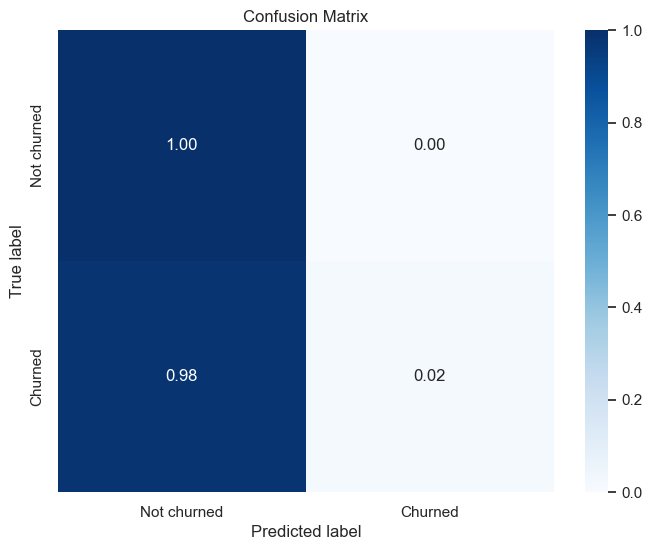

In [37]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_log, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

**Random Forest**

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predictions
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_prob = rf_model.predict_proba(x_test)[:, 1]

In [41]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8640
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4625
           1       0.73      0.42      0.54      1052

    accuracy                           0.86      5677
   macro avg       0.80      0.69      0.73      5677
weighted avg       0.85      0.86      0.85      5677

Confusion Matrix:
[[4459  166]
 [ 606  446]]


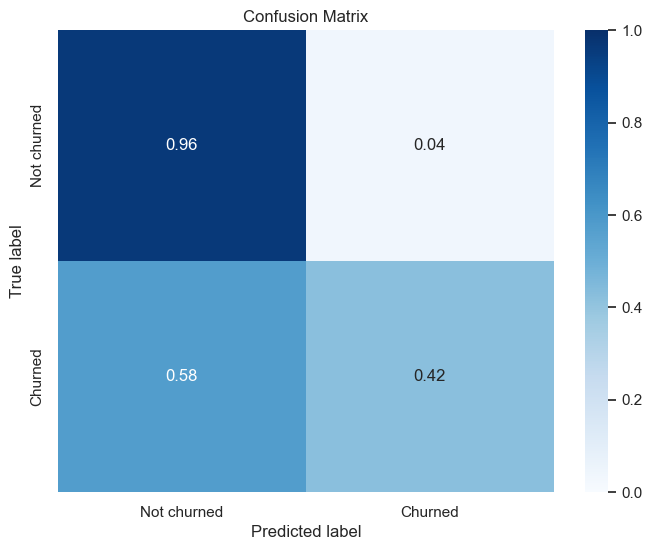

In [42]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

In [43]:
# Applying SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [44]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
rf_model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [46]:
y_train_pred = rf_model.predict(x_train_resampled)
y_test_pred = rf_model.predict(x_test)

In [47]:
print(f"Training Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.8286


In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.8286
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4625
           1       0.53      0.63      0.57      1052

    accuracy                           0.83      5677
   macro avg       0.72      0.75      0.73      5677
weighted avg       0.84      0.83      0.83      5677

Confusion Matrix:
[[4046  579]
 [ 394  658]]


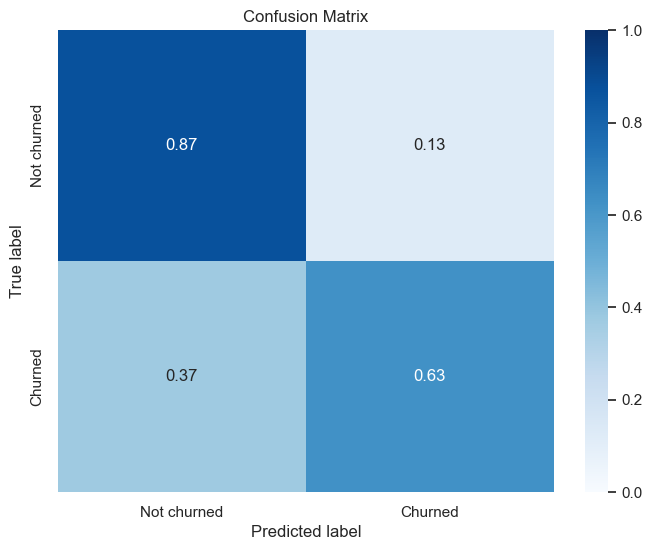

In [49]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

**XGBoost**

In [50]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [51]:
xgb_model.fit(x_train, y_train)

C:\Users\itsme\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
y_train_pred_xgb = xgb_model.predict(x_train)
y_test_pred_xgb = xgb_model.predict(x_test)

In [53]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_xgb):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")

Training Accuracy: 0.9461
Testing Accuracy: 0.8614


In [54]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))

Accuracy: 0.8614
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4625
           1       0.69      0.46      0.55      1052

    accuracy                           0.86      5677
   macro avg       0.79      0.71      0.74      5677
weighted avg       0.85      0.86      0.85      5677

Confusion Matrix:
[[4403  222]
 [ 565  487]]


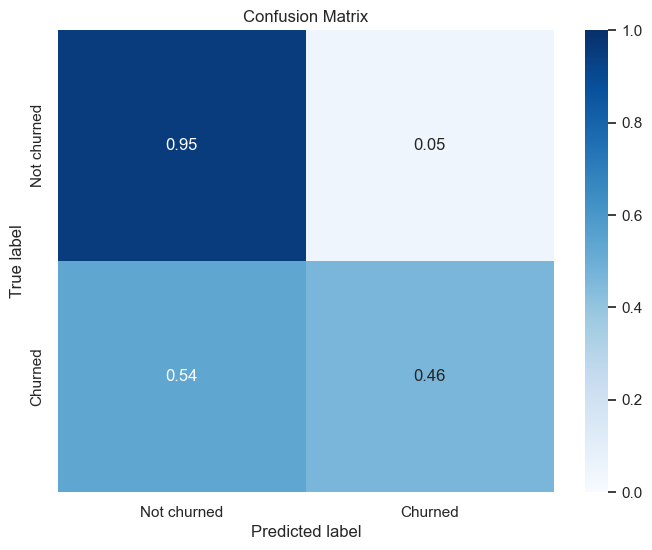

In [55]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xgb, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

In [56]:
# 4. Re-Running XGBoost using SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [57]:
# Applying SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [58]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [59]:
xgb_model.fit(x_train_resampled, y_train_resampled)

C:\Users\itsme\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [60]:
y_train_pred = xgb_model.predict(x_train_resampled)
y_test_pred = xgb_model.predict(x_test)

In [61]:
print(f"Training Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Training Accuracy: 0.9415
Testing Accuracy: 0.8455


In [62]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.8455
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4625
           1       0.58      0.58      0.58      1052

    accuracy                           0.85      5677
   macro avg       0.74      0.74      0.74      5677
weighted avg       0.84      0.85      0.85      5677

Confusion Matrix:
[[4193  432]
 [ 445  607]]


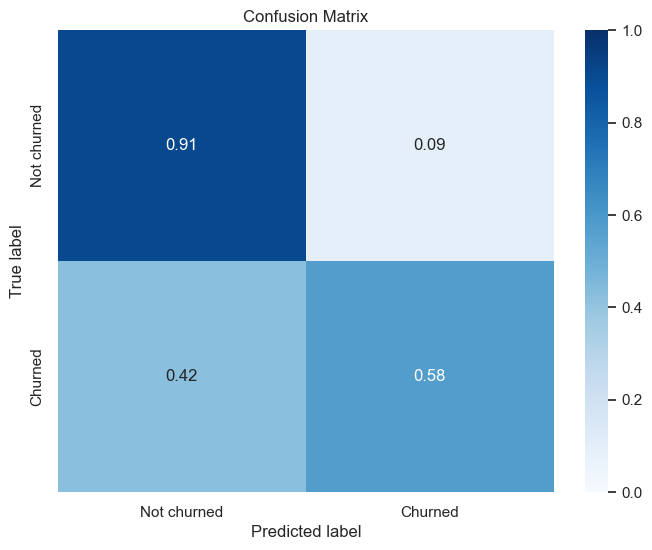

In [63]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

In [64]:
# Using Class weightage
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos  # Adjusts for class imbalance

In [65]:
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

In [67]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Training Accuracy: 0.9503
Testing Accuracy: 0.8416


In [68]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.8416
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4625
           1       0.57      0.62      0.59      1052

    accuracy                           0.84      5677
   macro avg       0.74      0.76      0.75      5677
weighted avg       0.85      0.84      0.84      5677

Confusion Matrix:
[[4124  501]
 [ 398  654]]


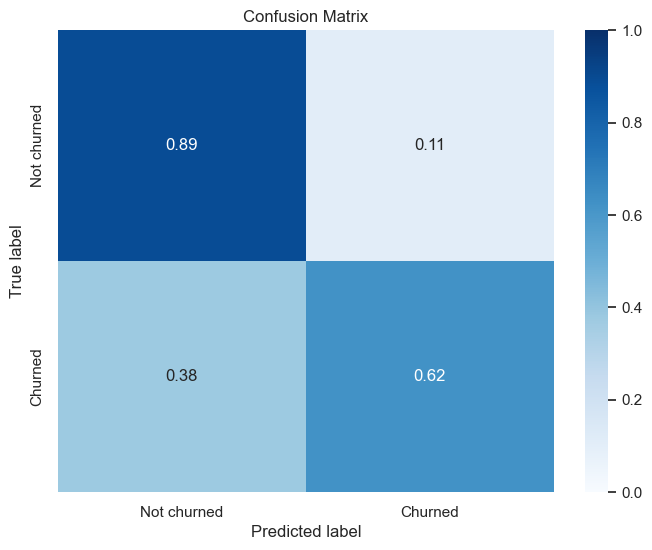

In [69]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

In [70]:
best_xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight, 
    max_depth=4,  # Reduce overfitting
    n_estimators=500,  # More trees improve generalization
    learning_rate=0.05,  # Slower learning for better accuracy
    colsample_bytree=0.8,  # Feature selection
    subsample=0.8,  # Prevents overfitting
    eval_metric='logloss',
    random_state=42
)
best_xgb.set_params(early_stopping_rounds=10)

best_xgb.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],  
    verbose=False  
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [71]:
y_train_pred = best_xgb.predict(x_train)
y_test_pred = best_xgb.predict(x_test)

In [72]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Training Accuracy: 0.8580
Testing Accuracy: 0.8348


In [73]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.8348
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      4625
           1       0.54      0.70      0.61      1052

    accuracy                           0.83      5677
   macro avg       0.73      0.78      0.75      5677
weighted avg       0.86      0.83      0.84      5677

Confusion Matrix:
[[3999  626]
 [ 312  740]]


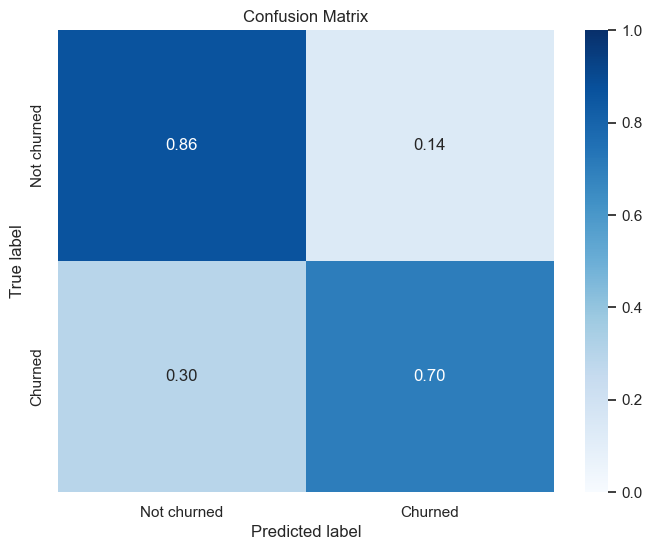

In [74]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

In [75]:
# Predictions
y_pred_xgb = best_xgb.predict(x_test)
y_pred_xgb_prob = best_xgb.predict_proba(x_test)[:, 1]

In [76]:
# Adjust decision threshold
threshold = 0.4  # Lower threshold improves recall
y_pred_adjusted = np.where(y_pred_xgb_prob > threshold, 1, 0)

In [77]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Accuracy: 0.7939

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4625
           1       0.47      0.77      0.58      1052

    accuracy                           0.79      5677
   macro avg       0.70      0.78      0.72      5677
weighted avg       0.85      0.79      0.81      5677


Confusion Matrix:
[[3701  924]
 [ 246  806]]


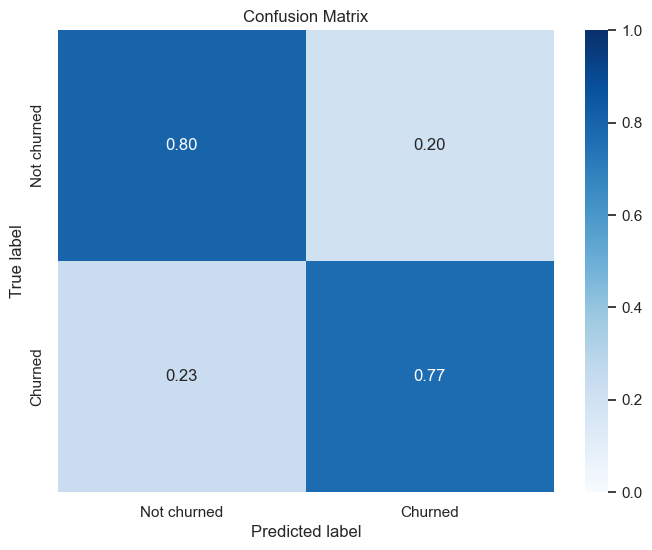

In [78]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted, normalize='true')
plot_confusion_matrix(cm, classes=["Not churned", "Churned"])

In [79]:
# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": best_xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feature_importance)

                           Feature  Importance
7                  current_balance    0.231967
13             current_month_debit    0.122707
15           current_month_balance    0.081713
14            previous_month_debit    0.063599
9    average_monthly_balance_prevQ    0.059101
10  average_monthly_balance_prevQ2    0.055118
16          previous_month_balance    0.053832
11            current_month_credit    0.034734
4                       occupation    0.032989
8       previous_month_end_balance    0.032165
12           previous_month_credit    0.032099
17     days_since_last_transaction    0.030971
3                       dependents    0.030597
1                              age    0.030152
0                          vintage    0.028408
5                             city    0.027857
6             customer_nw_category    0.027253
2                           gender    0.024739


In [80]:
# Storing the Feature Importances
feature_importance['Feature Importance Score'] = feature_importance['Importance'].round(4)
feature_importance.to_excel("feature_importance.xlsx")

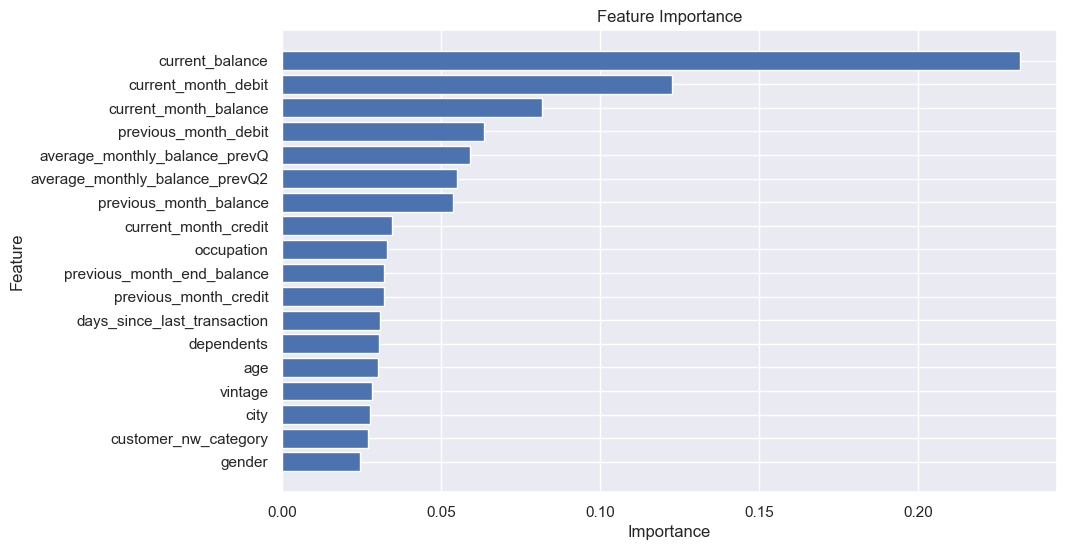

In [81]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

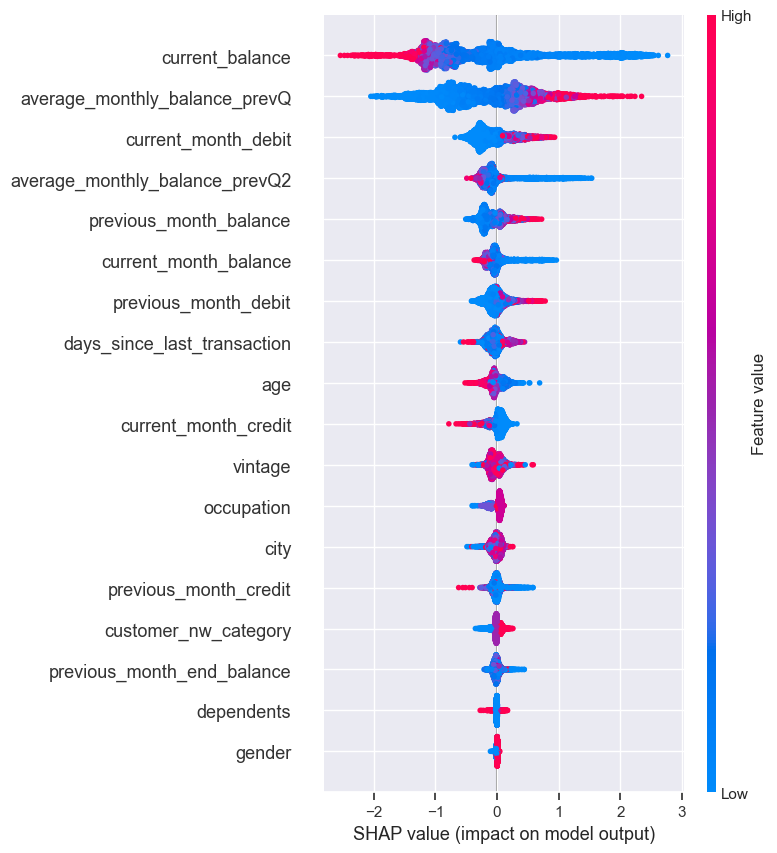

In [82]:
import shap

explainer = shap.Explainer(best_xgb)
shap_values = explainer(x_test)

# Summary plot to see overall impact
shap.summary_plot(shap_values, x_test)


In [83]:
# Identify low-importance features
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(shap_values.values).mean(axis=0)})
low_importance_features = feature_importance[feature_importance["Importance"] < 0.005]["Feature"].tolist()
print(low_importance_features)

[]


In [84]:
# Adding predictions back to the dataset
df['Exited Prediction'] = best_xgb.predict(x)
df['Exited Prediction Probability'] = best_xgb.predict_proba(x)[:, 1]

In [85]:
# Exporting predictions
df.to_excel("xgboost_predictions.xlsx", index=False)

In [86]:
# Saving the XGBoost model
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

In [87]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [1]:
import streamlit as st
import pickle
import pandas as pd
import plotly.express as px
import streamlit.components.v1 as components

# -------------------------------
# Step 1: Load Model and Scaler
# -------------------------------

st.set_page_config(layout="wide")

# Load trained XGBoost model
try:
    with open('best_xgboost_model.pkl', 'rb') as file:
        model = pickle.load(file)
except FileNotFoundError:
    st.error("`best_xgboost_model.pkl` not found! Please ensure the model file is in the correct directory.")
    st.stop()

# Load MinMaxScaler
try:
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)
except FileNotFoundError:
    st.error("`scaler.pkl` not found! Please ensure the scaler file is available.")
    st.stop()

# -------------------------------
# Step 2: Define Features
# -------------------------------

feature_names = [
    'vintage', 'age', 'gender', 'dependents', 'occupation', 'city',
    'customer_nw_category', 'current_balance', 'previous_month_end_balance',
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
    'current_month_credit', 'previous_month_credit', 'current_month_debit',
    'previous_month_debit', 'current_month_balance',
    'previous_month_balance', 'days_since_last_transaction'
]

# Columns requiring scaling
scale_vars = [
    'vintage', 'age', 'dependents', 'current_balance', 'previous_month_end_balance',
    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
    'current_month_credit', 'previous_month_credit', 'current_month_debit',
    'previous_month_debit', 'current_month_balance',
    'previous_month_balance', 'days_since_last_transaction'
]


# Step 3: Sidebar User Inputs (With Defaults)

st.sidebar.image("Pic 1.png", use_container_width=True)  # Display Pic 1
st.sidebar.header("User Inputs")

# Default values for user input (ensures valid predictions)
default_values = {
    "vintage": 60, "age": 35, "gender": "Male", "dependents": 2, "occupation": "salaried",
    "city": "1020", "customer_nw_category": "1", "current_balance": 50000,
    "previous_month_end_balance": 45000, "average_monthly_balance_prevQ": 42000,
    "average_monthly_balance_prevQ2": 40000, "current_month_credit": 15000,
    "previous_month_credit": 13000, "current_month_debit": 12000,
    "previous_month_debit": 11000, "current_month_balance": 40000,
    "previous_month_balance": 43000, "days_since_last_transaction": 30
}

# Collect user inputs
user_inputs = {}
for feature in feature_names:
    if feature in scale_vars:
        user_inputs[feature] = st.sidebar.number_input(feature, value=default_values[feature], step=1)
    else:
        if feature == "gender":
            user_inputs[feature] = st.sidebar.selectbox("Gender", options=["Male", "Female"], index=0)
        elif feature == "occupation":
            user_inputs[feature] = st.sidebar.selectbox("Occupation", options=["salaried", "self-employed", "unemployed"], index=0)
        elif feature == "customer_nw_category":
            user_inputs[feature] = st.sidebar.selectbox("Customer NW Category", options=["1", "2", "3"], index=0)
        elif feature == "city":
            user_inputs[feature] = st.sidebar.selectbox("City", options=["1020", "1030"], index=0)
        else:
            user_inputs[feature] = st.sidebar.text_input(feature, value=default_values[feature])

# Convert to DataFrame
input_data = pd.DataFrame([user_inputs])

# Ensure categorical variables are properly encoded (manual encoding for simplicity)
input_data.replace({
    "gender": {"Male": 1, "Female": 0},
    "occupation": {"salaried": 1, "self-employed": 2, "unemployed": 3},
    "customer_nw_category": {"1": 1, "2": 2, "3": 3},
    "city": {"1020": 1020, "1030": 1030}
}, inplace=True)

# -------------------------------
# Step 4: Apply MinMaxScaler
# -------------------------------

# Ensure all features are numeric before scaling
try:
    input_data_scaled = input_data.copy()
    input_data_scaled[scale_vars] = scaler.transform(input_data[scale_vars])
except ValueError as ve:
    st.error(f"Invalid input! Please check the values of your fields. Details: {ve}")
    st.stop()

# -------------------------------
# Step 5: Prediction
# -------------------------------
st.image("Pic 2.png", use_container_width=True)  # Display Pic 2
st.title("Customer Churn Prediction")

# Page Layout
left_col, right_col = st.columns(2)

with left_col:
    st.header("Feature Importance")
    # Load feature importance data from the Excel file
    feature_importance_df = pd.read_excel("feature_importance.xlsx", usecols=["Feature", "Feature Importance Score"])
    # Plot the feature importance bar chart
    fig = px.bar(
        feature_importance_df.sort_values(by="Feature Importance Score", ascending=True),
        x="Feature Importance Score",
        y="Feature",
        orientation="h",
        title="Feature Importance",
        labels={"Feature Importance Score": "Importance", "Feature": "Features"},
        width=400,  # Set custom width
        height=500  # Set custom height
    )
    st.plotly_chart(fig)

# Right Page: Prediction
with right_col:
    st.header("Prediction")
    if st.button("Predict"):
        try:
            # Get predicted probabilities and label
            probabilities = model.predict_proba(input_data_scaled)[0]
            prediction = model.predict(input_data_scaled)[0]
    
            # Map prediction to label
            prediction_label = "Churned" if prediction == 1 else "Retained"
    
            # Display results
            st.subheader(f"Predicted Value: **{prediction_label}**")
            st.write(f"**Churn Probability:** {probabilities[1]:.2%}")
            st.write(f"**Retention Probability:** {probabilities[0]:.2%}")
    
            # Display result with color indication
            if prediction == 1:
                st.error("High risk of churn! Take action to retain this customer.")
            else:
                st.success("Customer is likely to stay!")
        
        except Exception as e:
            st.error(f" Error in prediction: {e}")

# Step 6: Display Tableau Dashboard
#st.header("Customer Insights Dashboard")
#tableau_url = "https://public.tableau.com/views/Churn_Dashboard_17397175233280/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link"
#st.markdown(f'<iframe src="{tableau_url}" width="100%" height="600"></iframe>', unsafe_allow_html=True)

embed_code = '''
<div class='tableauPlaceholder' id='viz1739763468407' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;Churn_Dashboard_17397175233280&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Churn_Dashboard_17397175233280&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ch&#47;Churn_Dashboard_17397175233280&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1739763468407');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='607px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='607px';} else { vizElement.style.width='100%';vizElement.style.height='1627px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
''' 
st.header("Customer Insights Dashboard")
components.html(embed_code, height=800)

2025-02-17 15:40:08.120 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 15:40:09.718 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 15:40:09.758 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 15:40:10.527 
  command:

    streamlit run C:\Users\itsme\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-17 15:40:10.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 15:40:10.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-17 15:40:10.533 Thread 'MainThread'

DeltaGenerator()

In [89]:
df.shape

(28382, 21)

In [ ]:
!streamlit run churn_app.py